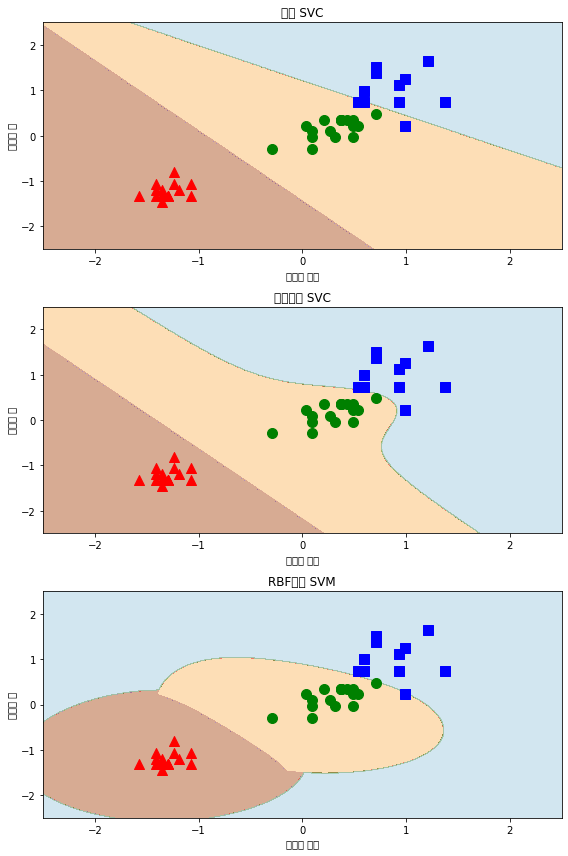

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()

In [3]:
import pickle
models_list = [model1, model2, model3]
model_name = ['linear_svm' , 'poly_svm' , 'rbf_svm']
for i in range(len(models_list)):
    with open(f'models/{model_name[i]}.pkl' , 'wb') as f:
        pickle.dump(models_list[i] , f)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
npts = 100
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)
ngridx = 100
ngridy = 100
xi = np.linspace(-2.2, 2.2, ngridx)
yi = np.linspace(-2.2, 2.2, ngridy)
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

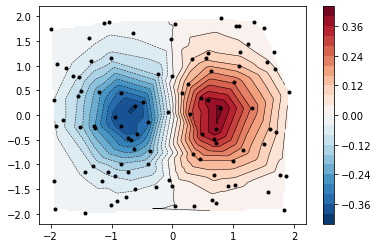

In [12]:
plt.contour(xi, yi, zi, levels=20, linewidths=0.5, colors='k')
cntr = plt.contourf(xi, yi, zi, levels=20, cmap="RdBu_r")
plt.colorbar(cntr)
plt.plot(x, y, 'ko', ms=3)
plt.show()